In [78]:
using Makie 
using AbstractPlotting
using AbstractPlotting.MakieLayout
using LinearAlgebra, DifferentialEquations
using Plots
AbstractPlotting.inline!(true)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [37]:
function graph_A(A)
    ode(x,y) = Point(A[1,1]*x + A[1,2]*y, 
                     A[2,1]*x + A[2,2]*y)
    scene, layout =layoutscene(resolution =(400,400))
    
    ax = layout[1,1] = Axis(scene, 
                            xlabel = "x",
                            ylabel = "y")
    streamplot!(ax, ode, (-2,2), (-2,2), 
            gridsize = (32,32),
            arrow_size = 0.05)
    hidespines!(ax)
    return scene
end


graph_A (generic function with 1 method)

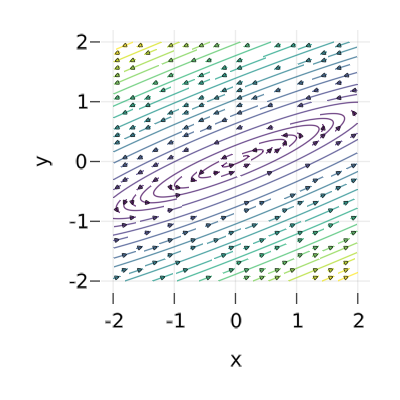

In [38]:
A = [2 -5;
     1 -2]

exer1 = graph_A(A)

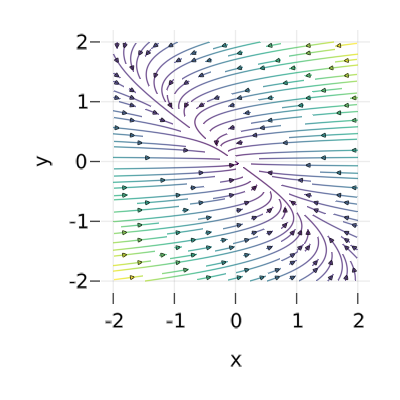

In [39]:
A = [-1 -1;
     0 -0.25]

exer2 = graph_A(A)

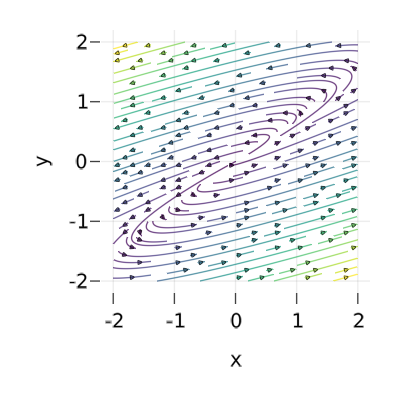

In [40]:
A = [3 -4;
     1 -1]

exer3 = graph_A(A)

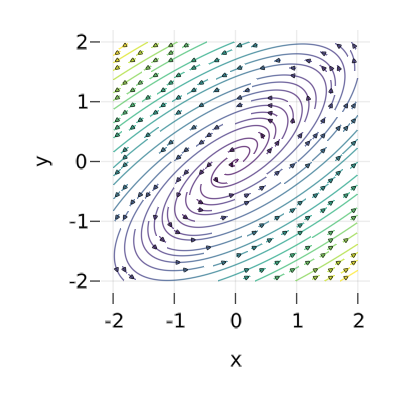

In [41]:
A = [2 -5/2;
     9/5 -1]

exer4 = graph_A(A)

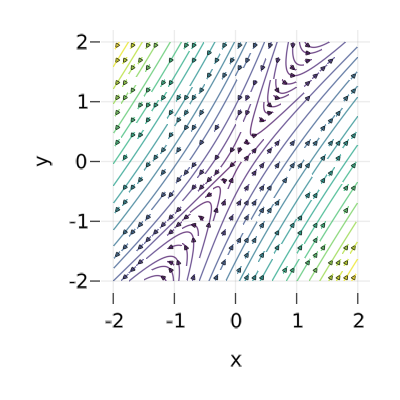

In [42]:
A = [2 -1;
     3 -2]

exer5 = graph_A(A)

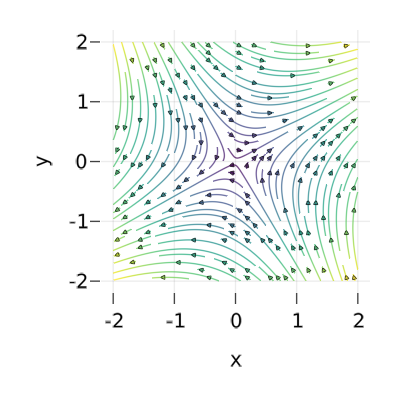

In [43]:
A = [1 sqrt(3);
    sqrt(3) -1]

exer6 = graph_A(A)

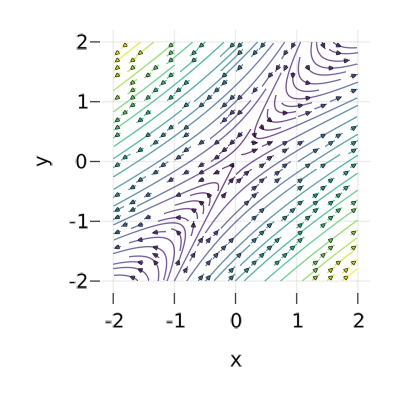

In [44]:
A = [3 -2;
     2 -2]

exer7 = graph_A(A)

In [45]:
# Exporting figures for Exercises 1-7
Makie.save("../hw/figs/hw-1-exer-1.png", exer1)
Makie.save("../hw/figs/hw-1-exer-2.png", exer2)
Makie.save("../hw/figs/hw-1-exer-3.png", exer3)
Makie.save("../hw/figs/hw-1-exer-4.png", exer4)
Makie.save("../hw/figs/hw-1-exer-5.png", exer5)
Makie.save("../hw/figs/hw-1-exer-6.png", exer6)
Makie.save("../hw/figs/hw-1-exer-7.png", exer7)

GLMakie.Screen(...)

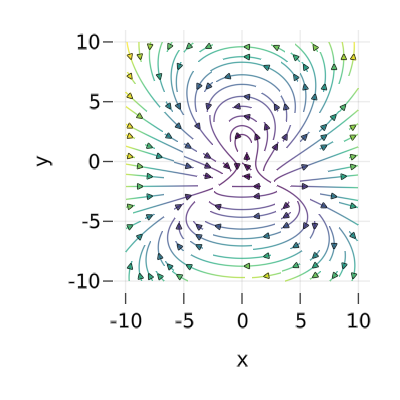

In [69]:
## Exercise 8
ode(x,y) = Point(-(x - y)*(1 - x - y), 
                 x*(2+y))
scene, layout =layoutscene(resolution =(400,400))
    
ax = layout[1,1] = Axis(scene, 
                            xlabel = "x",
                            ylabel = "y")
streamplot!(ax, ode, (-10,10), (-10,10), 
            gridsize = (24,24),
            arrow_size = 0.4)
hidespines!(ax)
exer8 = scene

In [70]:
Makie.save("../hw/figs/hw-1-exer-8.png", exer8)

GLMakie.Screen(...)

In [149]:
# Simulating the trajectories
function exer_8(du, u, p, t)
    du[1] = -(u[1] - u[2])*(1- u[1] - u[2])
    du[2] = u[1]*(2 + u[2])
end

u0 = 10*randn(2)
tspan = (0.0,50.0)
prob = ODEProblem(exer_8,u0,tspan)
sol = solve(prob, Tsit5(), saveat = 0.1);

Plots.plot(sol, vars = (1,2), 
                xlim = (-10, 10),
                ylim = (-10, 10),
                size = (400, 400),
                label = false)

for i in 1:100
    u0 =  5 .* (2 .* rand(2) .- 1)
    prob = ODEProblem(exer_8,u0,tspan)
    sol = solve(prob, Tsit5())
    
    Plots.plot!(sol, vars = (1,2), 
                xlim = (-10, 10),
                ylim = (-10, 10),
                label = false)
end

Plots.plot!()
Plots.scatter!([0.0 0.0], 
               [0.0 1.0],
                color = "Black",
                label = "Fixed Point")
Plots.savefig("../hw/figs/hw-1-exer-8-traj.png")

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /Users/marlinfiggins/.julia/packages/DiffEqBase/LIrLj/src/integrator_interface.jl:342


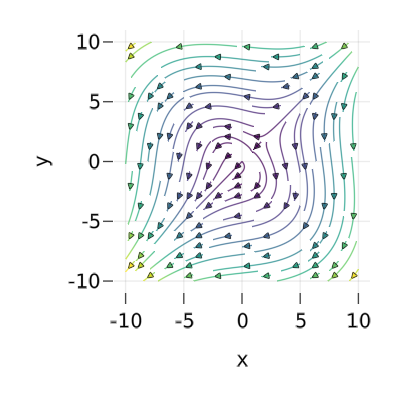

In [113]:
## Exercise 9
ode(x,y) = Point(x - y^2, 
                 y - x^2)
scene, layout =layoutscene(resolution =(400,400))
ax = layout[1,1] = Axis(scene, 
                            xlabel = "x",
                            ylabel = "y")
streamplot!(ax, ode, (-10,10), (-10,10), 
            gridsize = (24,24),
            arrow_size = 0.4)
hidespines!(ax)
exer9 = scene

In [72]:
Makie.save("../hw/figs/hw-1-exer-9.png", exer9)

GLMakie.Screen(...)

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ DiffEqBase /Users/marlinfiggins/.julia/packages/DiffEqBase/LIrLj/src/integrator_interface.jl:342


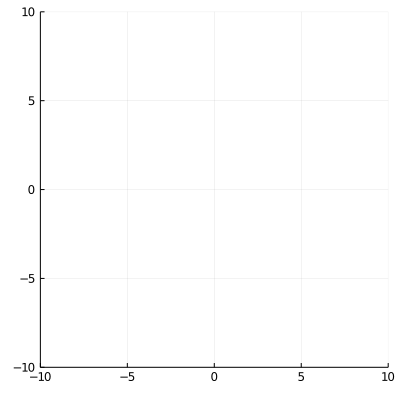

In [142]:
function exer_9(du, u, p, t)
    du[1] = u[1] - u[2]^2
    du[2] = u[2] - u[1]^2
end

u0 = rand(2)
tspan = (0.0,5.0)
prob = ODEProblem(exer_9,u0,tspan)
sol = solve(prob, Tsit5())

Plots.plot(sol, vars = (1,2), 
                xlim = (-10, 10),
                ylim = (-10, 10),
                size = (400, 400),
                label = false)

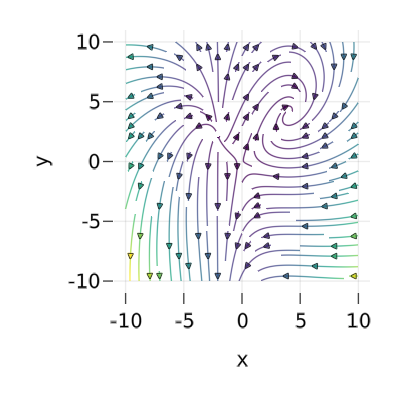

In [73]:
## Exercise 10
ode(x,y) = Point((2 + x)*(y - x), 
                 (4-x)*(y + x))
scene, layout =layoutscene(resolution =(400,400))
    
ax = layout[1,1] = Axis(scene, 
                            xlabel = "x",
                            ylabel = "y")
streamplot!(ax, ode, (-10,10), (-10,10), 
            gridsize = (24,24),
            arrow_size = 0.4)
hidespines!(ax)
exer10 = scene

In [74]:
Makie.save("../hw/figs/hw-1-exer-10.png", exer10)

GLMakie.Screen(...)

In [147]:
function exer_10(du, u, p, t)
    du[1] = (2 + u[1])*(u[2] - u[1])
    du[2] = (4 - u[1])*(u[1] + u[2])
end

u0 = rand(2)
tspan = (0.0,1.0)
prob = ODEProblem(exer_10,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

Plots.plot(sol, vars = (1,2), 
                xlim = (-10, 10),
                ylim = (-10, 10),
                size = (400, 400),
                label = false)

for i in 1:100
    u0 =  3 .* (2 .* rand(2) .- 1)
    prob = ODEProblem(exer_10,u0,tspan)
    sol = solve(prob, Tsit5())
    
    Plots.plot!(sol, vars = (1,2), 
                xlim = (-10, 10),
                ylim = (-10, 10),
                label = false)
end

Plots.plot!()
Plots.savefig("../hw/figs/hw-1-exer-10-traj.png")